In [1]:
import pandas as pd

In [2]:
raw_all_aledb_mut_df = pd.read_pickle('../all_aledb_raw_mut_df.pkl')
fur_muts = raw_all_aledb_mut_df[raw_all_aledb_mut_df['Gene'] == 'fur'].copy().reset_index(drop=True)

# AFI values are best as strings for matching against iModDB md.
fur_muts.ale = fur_muts.ale.astype(str)
fur_muts.flask = fur_muts.flask.astype(str)
fur_muts.isolate = fur_muts.isolate.astype(str)

display(fur_muts.head(), set(fur_muts.exp))

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source
0,ROS_eAMP,13,51,0,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public
1,ROS_eAMP,13,51,1,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public
2,ROS_eAMP,13,87,0,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public
3,ROS_eAMP,13,87,1,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public
4,ROS_eAMP,16,28,1,1,1.0,710522,SNP,C→T,R42H (CGT→CAT),fur,NC_000913,public


{'ROS_eAMP',
 'unpublished_ALE_experiment_1',
 'unpublished_ALE_experiment_11',
 'unpublished_ALE_experiment_120',
 'unpublished_ALE_experiment_130',
 'unpublished_ALE_experiment_136',
 'unpublished_ALE_experiment_178',
 'unpublished_ALE_experiment_179',
 'unpublished_ALE_experiment_20',
 'unpublished_ALE_experiment_208',
 'unpublished_ALE_experiment_218',
 'unpublished_ALE_experiment_25',
 'unpublished_ALE_experiment_33',
 'unpublished_ALE_experiment_367',
 'unpublished_ALE_experiment_6',
 'unpublished_ALE_experiment_75',
 'unpublished_ALE_experiment_9',
 'unpublished_ALE_experiment_92'}

In [3]:
imoddb_ale_md_df = pd.read_pickle('../data/imodulondb/imoddb_ale_md_df.pkl')
set(imoddb_ale_md_df['ALE exp'])

{'42C',
 'C13',
 'CCK',
 'CCK_GND',
 'CCK_PGI',
 'CCK_PTS',
 'CCK_SDH',
 'CCK_TPIA',
 'EEP',
 'EEP_menF',
 'EEP_menF_entC',
 'EEP_menF_entC_ubiC',
 'EEP_menFubiC',
 'EEP_pdhR-13',
 'EEP_pdhR-14',
 'EEP_pdhR-15',
 'EEP_pdhR-16',
 'EEP_ubiC',
 'FPS ptsI',
 'FPS serB',
 'FPS thrA',
 'GLU',
 'HOT_mutL',
 'Iron-ALE',
 'PAL',
 'ROS_eAMP',
 'SSW_GLU_AC',
 'SSW_GLU_GLY',
 'SSW_GLU_XYL',
 'SSW_GLY',
 'SSW_XYL',
 'pgiBME',
 'pgiPAE'}

In [4]:
imoddb_ale_md_df[['ale', 'flask', 'isolate']] = imoddb_ale_md_df['afir'].apply(lambda s: pd.Series(s.split('.')))
imoddb_ale_md_df.fillna('', inplace=True)
imoddb_ale_md_df.head()

,sample,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,afir,ALE exp,ale,flask,isolate
p1k_00125,glu__glu_ale3__1,Glucose Evolution,glu,glu_ale3,1,Escherichia coli GLU.3.412.1,MG1655,Batch,Endpoint,M9,...,,,,,,3.412.1,GLU,3,412,1
p1k_00126,glu__glu_ale4__1,Glucose Evolution,glu,glu_ale4,1,Escherichia coli GLU.4.403.1,MG1655,Batch,Endpoint,M9,...,,,,,,4.403.1,GLU,4,403,1
p1k_00127,glu__glu_ale5__1,Glucose Evolution,glu,glu_ale5,1,Escherichia coli GLU.5.288.1,MG1655,Batch,Endpoint,M9,...,,,,,,5.288.1,GLU,5,288,1
p1k_00128,glu__glu_ale6__1,Glucose Evolution,glu,glu_ale6,1,Escherichia coli GLU.6.406.1,MG1655,Batch,Endpoint,M9,...,,,,,,6.406.1,GLU,6,406,1
p1k_00129,glu__glu_ale8__1,Glucose Evolution,glu,glu_ale8,1,Escherichia coli GLU.8.380.1,MG1655,Batch,Endpoint,M9,...,,,,,,8.380.1,GLU,8,380,1


In [5]:
fur_muts['iModDB samples'] = ''
for imoddb_sample_id, r in imoddb_ale_md_df.iterrows():
    df = pd.DataFrame()
    if r.isolate == '':
        df = fur_muts[(fur_muts.exp == r['ALE exp']) & (fur_muts['ale'] == r.ale) & (fur_muts['flask'] == r.flask)]
    else:
        df = fur_muts[(fur_muts.exp == r['ALE exp']) & (fur_muts['ale'] == r.ale) & (fur_muts['flask'] == r.flask) & (fur_muts['isolate'] == r.isolate)]
    if len(df) > 0:
        for i, r2 in df.iterrows():
            if fur_muts.at[i, 'iModDB samples'] == '':
                fur_muts.at[i, 'iModDB samples'] = set()
            fur_muts.at[i, 'iModDB samples'].add(imoddb_sample_id)
imoddb_fur_muts = fur_muts[fur_muts['iModDB samples'] != ''].copy()
imoddb_fur_muts['AA sub'] = imoddb_fur_muts.Details.apply(lambda s: s.split(' ')[0])
imoddb_fur_muts.to_pickle('./imoddb_fur_mut_df.pkl')
imoddb_fur_muts

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,iModDB samples,AA sub
2,ROS_eAMP,13,87,0,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public,"{p1k_00546, p1k_00551, p1k_00548, p1k_00549, p...",P18T
3,ROS_eAMP,13,87,1,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public,"{p1k_00546, p1k_00551, p1k_00548, p1k_00549, p...",P18T
4,ROS_eAMP,16,28,1,1,1.0,710522,SNP,C→T,R42H (CGT→CAT),fur,NC_000913,public,"{p1k_00558, p1k_00559}",R42H
5,ROS_eAMP,17,104,0,1,1.0,710436,SNP,G→A,H71Y (CAC→TAC),fur,NC_000913,public,"{p1k_00575, p1k_00572, p1k_00571, p1k_00573, p...",H71Y
6,ROS_eAMP,17,104,1,1,1.0,710436,SNP,G→A,H71Y (CAC→TAC),fur,NC_000913,public,"{p1k_00575, p1k_00572, p1k_00571, p1k_00573, p...",H71Y
11,ROS_eAMP,19,91,0,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public,"{p1k_00592, p1k_00588, p1k_00586, p1k_00587, p...",P18T
12,ROS_eAMP,19,91,1,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public,"{p1k_00592, p1k_00588, p1k_00586, p1k_00587, p...",P18T
15,ROS_eAMP,3,76,0,1,1.0,710489,SNP,G→C,A53G (GCT→GGT),fur,NC_000913,public,"{p1k_00521, p1k_00519, p1k_00518, p1k_00520, p...",A53G
16,ROS_eAMP,3,76,1,1,1.0,710489,SNP,G→C,A53G (GCT→GGT),fur,NC_000913,public,"{p1k_00521, p1k_00519, p1k_00518, p1k_00520, p...",A53G
18,ROS_eAMP,9,77,0,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public,"{p1k_00538, p1k_00537, p1k_00534, p1k_00535, p...",P18T


In [6]:
from pymodulon.io import *

# ica = load_json_model('../data/imodulondb/precise1k.json')
ica = load_json_model('../data/imods/precise1k_with_ygfZ_muts.json.gz')
all_imoddb_md_df = pd.read_csv('../data/imodulondb/sample_table.csv', index_col=0)

In [7]:
Fur_1_2_imod_act_df = ica.A.loc[['Fur-1', 'Fur-2']].T
Fur_1_2_imod_act_df['fur mutation'] = ''
for _, r in imoddb_fur_muts.iterrows():
    for imoddb_sample_id in r['iModDB samples']:
        Fur_1_2_imod_act_df.at[imoddb_sample_id, 'fur mutation'] = 'fur ' + r['AA sub']
Fur_1_2_imod_act_df['fur mutation'] = Fur_1_2_imod_act_df['fur mutation'].apply(lambda s: 'none' if s == '' else s)

Fur_1_2_imod_act_df['Strain Description'] = Fur_1_2_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Strain Description'] if r.name in all_imoddb_md_df.index else '',axis=1)
Fur_1_2_imod_act_df['Supplement'] = Fur_1_2_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Supplement'] if r.name in all_imoddb_md_df.index else '',axis=1)
Fur_1_2_imod_act_df['project'] = Fur_1_2_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'project'] if r.name in all_imoddb_md_df.index else '',axis=1)
Fur_1_2_imod_act_df.fillna('', inplace=True)
Fur_1_2_imod_act_df

,Fur-1,Fur-2,fur mutation,Strain Description,Supplement,project
p1k_00001,-0.102584,-0.090960,none,Escherichia coli K-12 MG1655,,control
p1k_00002,0.102584,0.090960,none,Escherichia coli K-12 MG1655,,control
p1k_00003,11.940410,5.141262,none,Escherichia coli K-12 MG1655,DPD (0.2mM),fur
p1k_00004,10.888554,5.298588,none,Escherichia coli K-12 MG1655,DPD (0.2mM),fur
p1k_00005,-4.733862,-1.376197,none,Escherichia coli K-12 MG1655,FeCl2 (0.1mM),fur
...,...,...,...,...,...,...
SDT_ygfZ5,6.255769,2.738044,none,,,
SDT_ygfZ6,6.050982,2.106776,none,,,
SDT_ygfZ7,9.955249,5.183553,none,,,
SDT_ygfZ8,9.583027,4.981597,none,,,


In [8]:
# Checking with NB combining mutations from all genes
Fur_1_2_imod_act_df[Fur_1_2_imod_act_df['fur mutation'] != 'none']

,Fur-1,Fur-2,fur mutation,Strain Description,Supplement,project
p1k_00558,2.699092,1.660227,fur R42H,Escherichia coli ERS.16.28,paraquat (250uM),ros_tale
p1k_00559,2.490653,1.319152,fur R42H,Escherichia coli ERS.16.28,paraquat (250uM),ros_tale
p1k_00546,-1.009965,2.809720,fur P18T,Escherichia coli ERS.13.87,,ros_tale
p1k_00547,4.254692,5.748892,fur P18T,Escherichia coli ERS.13.87,,ros_tale
p1k_00548,-8.698194,-0.900546,fur P18T,Escherichia coli ERS.13.87,paraquat (250uM),ros_tale
p1k_00549,-6.664045,-0.166776,fur P18T,Escherichia coli ERS.13.87,paraquat (250uM),ros_tale
p1k_00550,-3.280183,2.738260,fur P18T,Escherichia coli ERS.13.87,paraquat (750uM),ros_tale
p1k_00551,-4.959185,3.370920,fur P18T,Escherichia coli ERS.13.87,paraquat (750uM),ros_tale
p1k_00568,-8.031274,-9.331911,fur H71Y,Escherichia coli ERS.17.104,,ros_tale
p1k_00569,-9.590137,-11.233554,fur H71Y,Escherichia coli ERS.17.104,,ros_tale


In [9]:
import re


proj_w_fur_vars = set(Fur_1_2_imod_act_df[Fur_1_2_imod_act_df['fur mutation'] != 'none'].project)
fur_proj_imod_act_df = Fur_1_2_imod_act_df[Fur_1_2_imod_act_df.project.isin(proj_w_fur_vars)].copy()
fur_proj_imod_act_df['paraquat (μM)'] = fur_proj_imod_act_df['Supplement'].apply(lambda s: '0' if s == '' else s)  # Better for plots
fur_proj_imod_act_df['paraquat (μM)'] = fur_proj_imod_act_df['paraquat (μM)'].apply(lambda s: s.replace('paraquat (', ''))  # Better for plot legend
fur_proj_imod_act_df['paraquat (μM)'] = fur_proj_imod_act_df['paraquat (μM)'].apply(lambda s: s.replace('uM)', ''))  # Better for plot legend
# display(fur_proj_imod_act_df['paraquat (μM)'].unique())

def _update_strain_description(sample_d):
    sd = sample_d['Strain Description']
    sd = sd.replace('Escherichia coli ', '')
    sd = sd.replace('K-12 MG1655', '')
    sd = sd.replace('ERS.', 'paraquat ALE ')

    if sample_d['fur mutation'] != 'none':
        m = re.search(r"\d", sd)
        sd = sd[:m.start()-1]

    if sample_d['fur mutation'] == 'none':
        if sample_d['project'] == 'ros_tale':
            sd = 'no Fur mutation'
        if "ALE4" in sample_d['Strain Description']:
            sd = 'no Fur mutation'

    return sd

fur_proj_imod_act_df['Strain Description'] = fur_proj_imod_act_df.apply(lambda r: _update_strain_description(r), axis=1)
set(fur_proj_imod_act_df['Strain Description'])

{'no Fur mutation', 'paraquat ALE'}

In [10]:
fur_proj_imod_act_df['fur mutation'] = fur_proj_imod_act_df['fur mutation'].apply(lambda s: s.replace('fur ', ''))
fur_proj_imod_act_df['Strain'] = fur_proj_imod_act_df.apply(
    lambda r: r['fur mutation'] + ' (' + r['Strain Description'] + ')' if r['fur mutation'] != 'none' else r['Strain Description'],
    axis=1)
# fur_proj_imod_act_df['Strain'] = fur_proj_imod_act_df['Strain'].apply(lambda s:
#     "Starting strain (paraquat ALE)" if s == "Starting strain E. coli paraquat ALE" else s)
display(set(fur_proj_imod_act_df.Strain))

{'A53G (paraquat ALE)',
 'H71Y (paraquat ALE)',
 'P18T (paraquat ALE)',
 'R42H (paraquat ALE)',
 'no Fur mutation'}

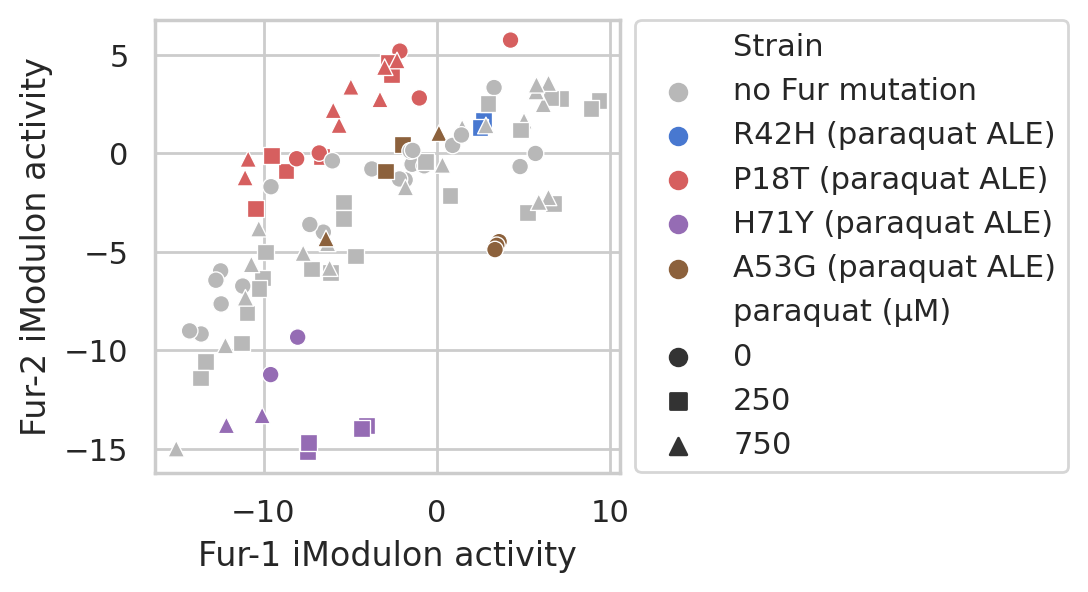

In [11]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_theme(
    style="whitegrid",
    # palette="muted"
)

# Width of 4 is best for keeping dots from substantial overlap
figure(figsize=(3, 3), dpi=200)

# strain_clr_d = {
#     'WT fur E. coli paraquat ALE': '#B3B3B3',
#  'fur A53G E. coli paraquat ALE 3.76': "#8C613C",
#  'fur H71Y E. coli paraquat ALE 17.104': '#956CB4',
#  'fur P18T E. coli paraquat ALE 13.87': '#D65F5F',
#  'fur P18T E. coli paraquat ALE 19.91': '#6ACC64',
#  'fur P18T E. coli paraquat ALE 9.77': '#EE854A',
#  'fur R42H E. coli paraquat ALE 16.28': '#4878D0',
#  'Starting strain E. coli paraquat ALE': 'black'
#  }

strain_clr_d = {
    'A53G (paraquat ALE)': "#8C613C",
    'H71Y (paraquat ALE)': '#956CB4',
    'P18T (paraquat ALE)': '#D65F5F',
    'R42H (paraquat ALE)': '#4878D0',
    # 'Starting strain E. coli paraquat ALE': 'black',
    'no Fur mutation': '#B8B8B8',
    # 'all other iModulon samples': '#B8B8B8'
}

m_d = {'0': 'o', '250': 's', '750': '^'}

ax = sns.scatterplot(
    data=fur_proj_imod_act_df, x='Fur-1', y='Fur-2', hue='Strain', palette=strain_clr_d, style='paraquat (μM)', markers=m_d)
ax.set(xlabel="Fur-1 iModulon activity")
ax.set(ylabel="Fur-2 iModulon activity")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          # title='fur variants'
          )

# plt.savefig("f4c.svg")

In [12]:
samples_to_drop = fur_proj_imod_act_df.index.tolist()

# Removing all samples in other categories
other_sample_imod_act_df = ica.A.loc[['Fur-1', 'Fur-2']].T
other_sample_imod_act_df.drop(samples_to_drop, inplace=True)
assert(len(set(samples_to_drop) & set(other_sample_imod_act_df.index.tolist())) == 0)
# all_others_cat_name = 'all other iModulon samples (' + str(len(other_sample_imod_act_df)) + ')'
all_others_cat_name = 'no Fur mutation'
other_sample_imod_act_df['Strain'] = all_others_cat_name
other_sample_imod_act_df['paraquat (μM)'] = '0'
other_sample_imod_act_df.head()

,Fur-1,Fur-2,Strain,paraquat (μM)
p1k_00001,-0.102584,-0.090960,no Fur mutation,0
p1k_00002,0.102584,0.090960,no Fur mutation,0
p1k_00003,11.940410,5.141262,no Fur mutation,0
p1k_00004,10.888554,5.298588,no Fur mutation,0
p1k_00005,-4.733862,-1.376197,no Fur mutation,0


In [13]:
all_sample_imod_act_df = pd.concat([fur_proj_imod_act_df, other_sample_imod_act_df])

amount_of_samples_per_cat = all_sample_imod_act_df.groupby(['paraquat (μM)']).size().reset_index(name='counts')
amount_of_samples_per_cat_d = {}
for _, r in amount_of_samples_per_cat.iterrows():
    amount_of_samples_per_cat_d[r['paraquat (μM)']] = r['counts']
display(amount_of_samples_per_cat_d)
all_sample_imod_act_df['paraquat (μM)'] = all_sample_imod_act_df['paraquat (μM)'].apply(lambda s: 
    s + " (" + str(amount_of_samples_per_cat_d[s]) + " samples)")
all_sample_imod_act_df['paraquat (μM)'].unique()

{'0': 980, '250': 36, '750': 31}

array(['0 (980 samples)', '250 (36 samples)', '750 (31 samples)'],
      dtype=object)

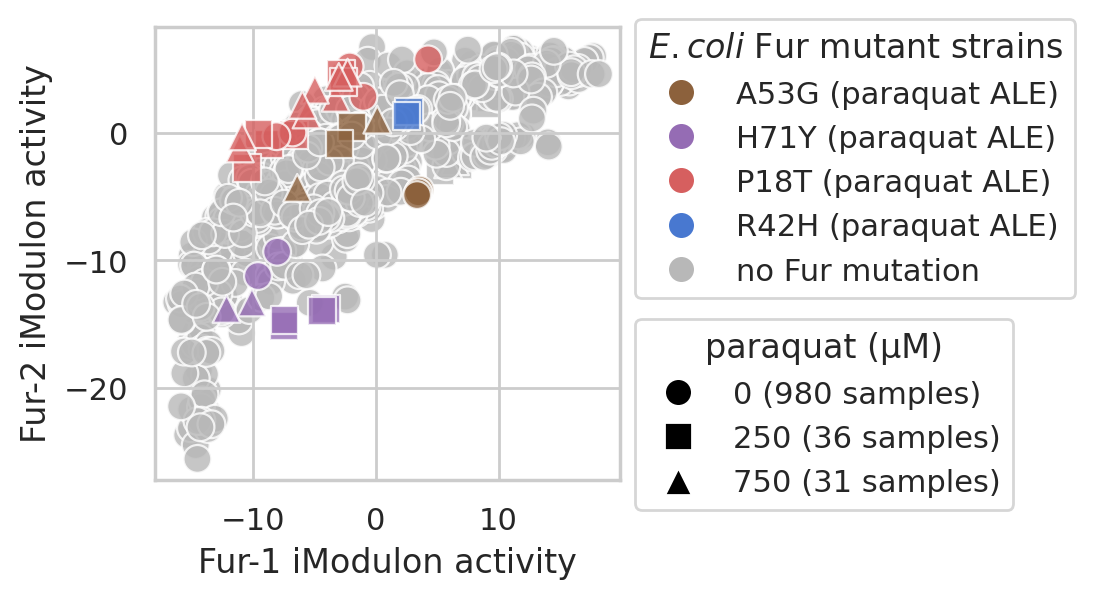

In [14]:
figure(figsize=(3, 3), dpi=200)

strains_z_order = [
    # 'all other iModulon samples',
    'no Fur mutation',
    'A53G (paraquat ALE)',
    'H71Y (paraquat ALE)',
    'P18T (paraquat ALE)',
    'R42H (paraquat ALE)',
]

hue_z_order = [strain_clr_d[k] for k in strains_z_order]

m_d = {'0 (980 samples)': 'o', '250 (36 samples)': 's', '750 (31 samples)': '^'}

for z_order, s in enumerate(strains_z_order):
    df = all_sample_imod_act_df[all_sample_imod_act_df.Strain == s]
    sns.scatterplot(
        data=df, x='Fur-1', y='Fur-2',
        hue='Strain',
        palette=strain_clr_d, style='paraquat (μM)', markers=m_d,
        zorder=z_order,
        s=100,
        alpha=0.8,
    )

legend_colors = [plt.Line2D([0], [0], marker='o', linestyle="None", color=color, label=color_name, markerfacecolor=color, markersize=8) for color_name, color in strain_clr_d.items()]
legend1 = plt.legend(handles=legend_colors, title="$\it{E. coli}$ Fur mutant strains", loc="upper left", bbox_to_anchor=(1, 1.05))

legend_shapes = [plt.Line2D([0], [0], marker=marker, linestyle="None", color='w', label=group, markerfacecolor='black', markersize=10) for group, marker in m_d.items()]
legend2 = plt.legend(handles=legend_shapes, title="paraquat (μM)", loc="lower left", bbox_to_anchor=(1, -0.1), ncol=1)

ax = plt.gca()
ax.add_artist(legend1)  # Add the first legend back (it gets removed when the second legend is added)
ax.set(xlabel="Fur-1 iModulon activity")
ax.set(ylabel="Fur-2 iModulon activity")

plt.savefig("f4c.svg")